In [ ]:
import tensorflow as tf


In [ ]:
import numpy as np

TRUE_MU = 10.0
TRUE_SIGMA = 5.0
SAMPLE_SIZE = 100

np.random.seed(0)
x_obs = np.random.normal(loc=TRUE_MU, scale=TRUE_SIGMA, size=SAMPLE_SIZE)




In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_obs)
plt.ylabel('some numbers')
plt.show()

In [ ]:
CENTER = x_obs.min()
SCALE = x_obs.max() - x_obs.min()
x_obs = (x_obs - CENTER) / SCALE

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_obs)
plt.ylabel('some numbers')
plt.show()

In [ ]:
import tensorflow as tf

# data
x = tf.placeholder(dtype=tf.float32)

INIT_MU_PARAMS = {'loc': 0.0, 'scale': 0.1}
INIT_PHI_PARAMS = {'loc': 1.0, 'scale': 0.1}
RANDOM_SEED = 0

# params
np.random.seed(RANDOM_SEED)
mu = tf.Variable(initial_value=np.random.normal(**INIT_MU_PARAMS),
                 dtype=tf.float32)
phi = tf.Variable(initial_value=np.random.normal(**INIT_PHI_PARAMS),
                  dtype=tf.float32)
sigma = tf.square(phi)

# loss
gaussian_dist = tf.contrib.distributions.Normal(loc=mu, scale=sigma)
log_prob = gaussian_dist.log_prob(value=x)
neg_log_likelihood = -1.0 * tf.reduce_sum(log_prob)

# gradient
grad = tf.gradients(neg_log_likelihood, [mu, phi])

In [ ]:
print(np.random.normal(**INIT_MU_PARAMS))

In [ ]:
print(np.random.normal(**INIT_PHI_PARAMS))

In [ ]:
samples=1000;
normal_random = []

from itertools import repeat
  
for sample in repeat(None, samples):
    normal_random.append(np.random.normal(**INIT_MU_PARAMS))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(normal_random)
plt.ylabel('some numbers')
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sigma_plt = tf.Session().run(tf.constant(sigma))
plt.plot(sigma_plt)
plt.ylabel('some numbers')
plt.show()

In [ ]:

print(sigma_plt)

In [1]:
import tensorflow_probability as tfp


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
import tensorflow as tf; 

tf.enable_eager_execution(); 

print(tf.reduce_sum(tf.random_normal([1000, 1000])))

tf.Tensor(394.627, shape=(), dtype=float32)


In [17]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
reuters = tf.keras.datasets.reuters

#(x_train, y_train),(x_test, y_test) = mnist.load_data()

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

#x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

ValueError: Error when checking input: expected flatten_1_input to have 3 dimensions, but got array with shape (8982, 1)

In [4]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [13]:
import pandas as pd
print(x_train.shape)
#df=pd.DataFrame(x_train)

(60000, 28, 28)


In [230]:
from scipy import stats
import numpy as np
%matplotlib inline

(0.0, 410.0)

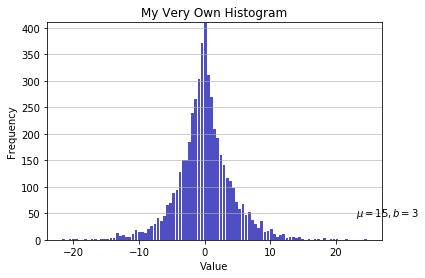

In [248]:
np.random.seed(444)
np.set_printoptions(precision=3)

d_1 = np.random.laplace(loc=0, scale=3, size=5000)

import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d_1, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 700.0)

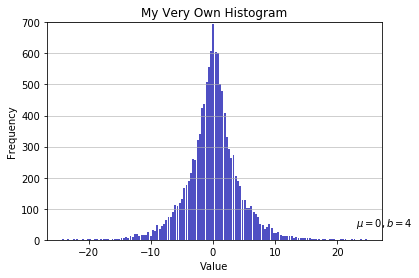

In [249]:
np.random.seed(4556)
np.set_printoptions(precision=3)

d_2 = np.random.laplace(loc=0, scale=3, size=12000)

import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d_2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=0, b=4$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [250]:
stats.ks_2samp(d_1, d_2)

Ks_2sampResult(statistic=0.02585000000000004, pvalue=0.017543228205728942)

In [251]:
d_1_attr = d_1.reshape((1250, 4))
df_d_1 = pd.DataFrame(d_1_attr,columns=['Attribute1','Attribute2','Attribute3','Attribute4'])

In [252]:
df_d_1['class']=0
df_d_1.head()

,Attribute1,Attribute2,Attribute3,Attribute4,class
0,3.406346,3.086615,1.003962,1.221403,0
1,-7.642397,-6.089789,-1.777185,-1.373177,0
2,-2.846559,-2.792799,3.596046,3.462846,0
3,-1.092698,1.958807,-0.039808,-0.166464,0
4,-4.019424,-1.079004,5.416228,2.137850,0


In [253]:
d_2_attr = d_2.reshape((3000, 4))
df_d_2 = pd.DataFrame(d_2_attr,columns=['Attribute1','Attribute2','Attribute3','Attribute4'])

In [254]:
df_d_2['class']=1
df_d_2.head()

,Attribute1,Attribute2,Attribute3,Attribute4,class
0,0.990624,1.577357,-2.830015,1.837319,1
1,3.543778,1.597724,6.457256,-0.215312,1
2,7.695030,-5.032466,2.404352,-4.391694,1
3,0.377839,0.018547,-2.587268,2.754317,1
4,-1.399712,-0.063280,-1.042548,8.036115,1


In [255]:
from keras import utils

df=df_d_1.append(df_d_2)
msk = np.random.rand(len(df)) < 0.6
X_short_train = df[msk]
Y_short_train = X_short_train['class']
X_short_test = df[~msk]
Y_short_test = X_short_test['class']

X_short_train = X_short_train.drop(columns=['class'])
X_short_test = X_short_test.drop(columns=['class'])

Y_short_train = utils.to_categorical(Y_short_train)
Y_short_test = utils.to_categorical(Y_short_test)


In [256]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_short_train = lb.fit_transform(Y_short_train)
Y_short_test = lb.transform(Y_short_test)
print('Train labels dimension:');print(Y_short_train.shape)
print('Test labels dimension:');print(Y_short_test.shape)


Train labels dimension:
(2518, 2)
Test labels dimension:
(1732, 2)


In [257]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
# Adds a densely-connected layer with 64 units to the model:
layers.Dense(64, activation='relu', input_shape=(4,)),
# Add another:
layers.Dense(64, activation='relu'),
# Add a softmax layer with 10 output units:
layers.Dense(2, activation='softmax')])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_short_train, Y_short_train, 
                    batch_size=5, 
                    epochs=5, 
                    verbose=1, 
                    validation_split=0.1)


score = model.evaluate(X_short_test, Y_short_test, 
                       batch_size=5, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])



Train on 2266 samples, validate on 252 samples
Epoch 1/5
2266/2266 [==============================] - 1s 567us/sample - loss: 0.6674 - acc: 0.6540 - val_loss: 0.3947 - val_acc: 0.9960
Epoch 2/5
2266/2266 [==============================] - 0s 219us/sample - loss: 0.6430 - acc: 0.6677 - val_loss: 0.5983 - val_acc: 0.7778
Epoch 3/5
2266/2266 [==============================] - 0s 220us/sample - loss: 0.6394 - acc: 0.6699 - val_loss: 0.4372 - val_acc: 0.9921
Epoch 4/5
2266/2266 [==============================] - 1s 221us/sample - loss: 0.6355 - acc: 0.6717 - val_loss: 0.3763 - val_acc: 0.9762
Epoch 5/5
1732/1732 [==============================] - 0s 102us/sample - loss: 0.6295 - acc: 0.6917
Test score: 0.6295375735531228
Test accuracy: 0.6916859


In [260]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_short_test)
cm = confusion_matrix(np.argmax(Y_short_test,axis=1), y_pred)
#print(Y_short_test)
#print(np.argmax(Y_short_test,axis=1))
print(cm)

[[   1  521]
 [  13 1197]]
